# Regression Task

Predict student performance in secondary education (attribute named G3) in
Student Performance Dataset

*student.csv - Student Performance Dataset*

*student.txt - Dataset description for student data*

### Preprocessing

###### Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing student csv as pandas dataframe
student_df = pd.read_csv("/content/student.csv")

##### Getting overview of data

In [ ]:
# Getting a quick look at dataset 
student_df.head()

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10


In [ ]:
# Getting basic stats
student_df.describe()

,age,Medu,Fedu,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,380.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.705263,2.749367,2.521519,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.277974,1.094735,1.088201,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


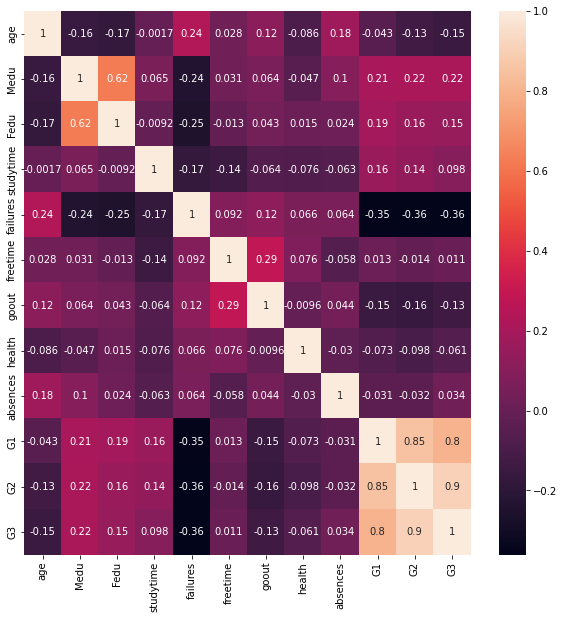

In [ ]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(student_df.corr(), annot=True, ax =ax)

##### Converting categorical data to relevent numeric form

###### One-hot encoding

In [ ]:
# One hot encoding on School, Sex, Address, 
column_name_to_one_hot = [
  "school",
  "address",
  "sex"
]

In [ ]:
# One-hot encoding
student_df = pd.get_dummies(student_df, columns=column_name_to_one_hot)

###### Label encoding

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Label Encoding on activities, nursery, higher
label_encode_activity = student_df["activities"]
label_encode_nursery = student_df["nursery"]
label_encode_higher = student_df["higher"]

In [ ]:
# Dropping Encoded Column
student_df.drop("activities", 1, inplace=True)
student_df.drop("nursery", 1, inplace=True)
student_df.drop("higher", 1, inplace=True)

In [ ]:
# Labeled encoded required columns
student_df["activity"] = label_encoder.fit_transform(label_encode_activity)
student_df["nursery"]  = label_encoder.fit_transform(label_encode_nursery)
student_df["higher"]   = label_encoder.fit_transform(label_encode_higher)

##### Removing null values

In [ ]:
# Getting number of null values in each column
student_df.isna().sum()

age          15
Medu          0
Fedu          0
studytime     0
failures      0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
school_GP     0
school_MS     0
address_R     0
address_U     0
sex_F         0
sex_M         0
activity      0
nursery       0
higher        0
dtype: int64

In [ ]:
student_df["age"].value_counts(dropna=False)

16.0    97
17.0    97
15.0    79
18.0    79
19.0    23
NaN     15
20.0     3
21.0     1
22.0     1
Name: age, dtype: int64

In [ ]:
# replacing NaN values
# since it is age we can replace it with median value
student_df["age"].fillna(student_df["age"].median(), inplace=True)

In [ ]:
# Getting idea about which columns has null values is '?'
(student_df == '?').sum()

age          0
Medu         0
Fedu         0
studytime    0
failures     0
freetime     0
goout        0
health       0
absences     0
G1           0
G2           0
G3           0
school_GP    0
school_MS    0
address_R    0
address_U    0
sex_F        0
sex_M        0
activity     0
nursery      0
higher       0
dtype: int64

In [ ]:
# Getting number of null values in each column again for sanity check
student_df.isna().sum()

age          0
Medu         0
Fedu         0
studytime    0
failures     0
freetime     0
goout        0
health       0
absences     0
G1           0
G2           0
G3           0
school_GP    0
school_MS    0
address_R    0
address_U    0
sex_F        0
sex_M        0
activity     0
nursery      0
higher       0
dtype: int64

##### Removing duplicated rows

In [ ]:
# checking duplicate rows
# serial no. should be removed before checking duplicates (we don't have any such column)
# Getting count of duplicate rows 
student_df.duplicated().sum()

0

##### Splitting the dataset

In [ ]:
# Shuffle data well to take out random data for training and testing
shuffled_df = student_df.sample(frac=1, random_state=0)
# Define size of training data
train_size = (int)(0.8*len(student_df))
# Make separate df for training and testing
train_set = shuffled_df[:train_size]
test_set = shuffled_df[train_size:]
print(len(test_set), len(train_set))

79 316


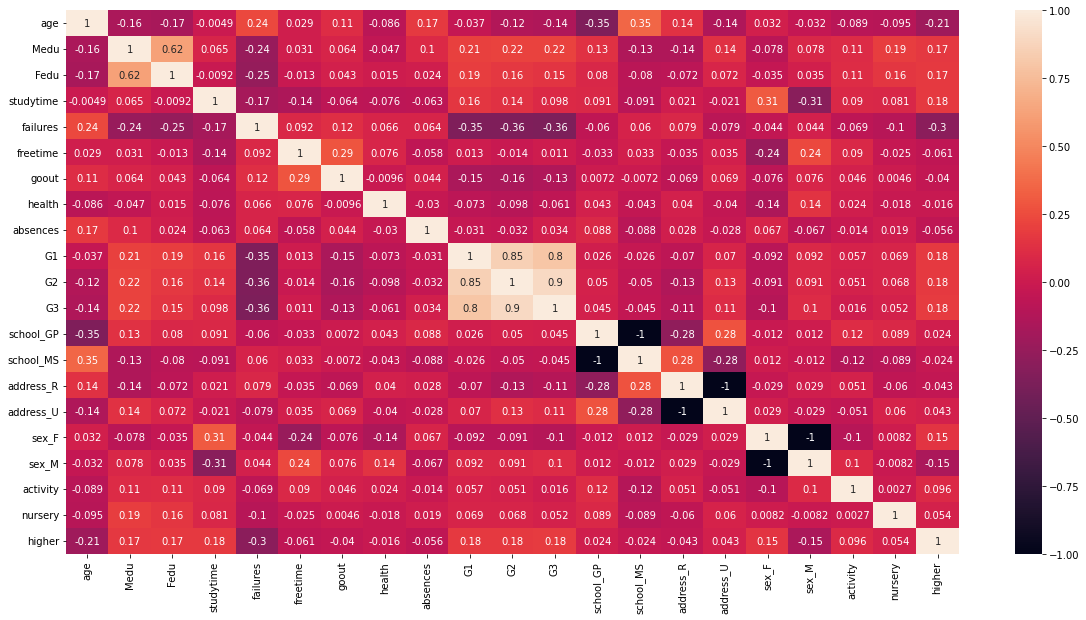

In [ ]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(20,10)) 
sn.heatmap(student_df.corr(), annot=True, ax=ax)

### Univariate & Multivariate Linear Regression Model Classes

###### Univariate Closed Form Class

In [ ]:
class univariate_closed_form:
  # Learning Algorithm 
  def train(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
    # Adding additions columns of 1's for bias
    X_train = np.c_[X_train, np.ones(len(X_train))]
    # slope, bias = (Inverse(Tanspose(X)*X))*(Transpose(X)*Y)
    self.m, self.b = np.linalg.inv(X_train.T@X_train)@(X_train.T@Y_train) 

  # Inference Algorithm
  def predict(self, X_test):
    self.X_test = X_test
    # calculating predicted values using calculated parameters
    self.Y_pred = self.m*X_test + self.b
    return self.Y_pred

  # plotting the curve
  def plot(self):
    plt.scatter(self.X_train, self.Y_train)
    plt.plot(self.X_test, self.Y_pred, color="red")
    plt.show()

  # scores to measure accuracy
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

##### Univariate Gradient Descent Class

In [ ]:
class univaraite_gradient_descent:
  def __init__(self, iterations = 3000, learning_rate = 0.0001):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.costs = []
    np.random.seed(4)
    # randomly initilizating m, b initially
    self.m, self.b = np.random.uniform(low=-1, high=1, size=2) 

  # Learning Algorithm 
  def train(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
    b, m = self.b, self.m
    n_entries = len(X_train)
    # Iterating to minimize cost
    for _ in range(self.iterations):
      Y_pred = m*X_train + b
      cost = np.mean((Y_train - Y_pred)**2)
      self.costs.append(cost)
      # ∂J/∂Θ
      dm = (1/n_entries)*(-2*Y_train.T@X_train + 2*m*X_train.T@X_train + 2*b*np.sum(X_train))
      db = (1/n_entries)*(-2*np.sum(Y_train) + 2*m*np.sum(X_train) + 2*n_entries*b)
      # Θ(new) = Θ(old) - μ*∂J/∂Θ
      m = m - self.learning_rate*dm
      b = b - self.learning_rate*db

  # Inference Algorithm
  def predict(self, X_test):
    self.X_test = X_test
    self.Y_pred = self.m*X_test + self.b
    return self.Y_pred

  # plotting the cost curve
  def plotCosts(self):
    plt.title("Gradient Descent cost plot")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.plot(self.costs)
    plt.show()

  # plotting the plot
  def plot(self):
    plt.scatter(self.X_train, self.Y_train)
    plt.plot(self.X_test, self.Y_pred, color="red")
    plt.show()

  # scores to measure accuracy
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

##### Univariate Newton's Method Class

In [ ]:
class univariate_newtons_method:
  def __init__(self,iterations=10, learning_rate = 0.1):
    self.iterations = iterations
    self.learning_rate = learning_rate
    self.costs = []

  # Learning Algorithm 
  def train(self, X_train, Y_train):
    slope, intercept = 0, 0
    self.X_train = X_train
    self.Y_train = Y_train
    n_entries = len(X_train)
    for _ in range(self.iterations):
      Y_pred = slope*X_train + intercept
      cost = np.mean((Y_train - Y_pred)**2)
      self.costs.append(cost)
      # Hessian matrix
      H = np.zeros((2, 2))
      H[0][0] = 2*len(X_train)
      H[0][1] = 2*np.sum(X_train)
      H[1][0] = 2*np.sum(X_train)
      H[1][1] = 2*X_train@X_train
      HInv = np.linalg.inv(H)
      # single differential of cost function
      dm = (1/n_entries)*(-2*Y_train.T@X_train + 2*slope*X_train.T@X_train + 2*intercept*np.sum(X_train))
      db = (1/n_entries)*(-2*np.sum(Y_train) + 2*slope*np.sum(X_train) + 2*n_entries*intercept)
      # Newtons Method
      # Θ(new) = Θ(old) - inv(H)*∂J/∂Θ
      slope = slope - self.learning_rate*(HInv[0][0]*dm + HInv[0][1]*db)
      intercept = intercept - self.learning_rate*(HInv[1][0]*dm + HInv[1][1]*db)
    self.slope, self.intercept = slope, intercept
  
  # Inference Algorithm
  def predict(self, X_test):
    self.X_test = X_test
    # Y = MX+C
    self.Y_pred = self.slope*X_test+self.intercept
    return self.Y_pred

  # plotting cost
  def plotCosts(self):
    if self.iterations == 1:
      return
    plt.title("Newton's Method cost plot")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.plot(self.costs)
    plt.show()

  # plotting the curve
  def plot(self):
    plt.scatter(self.X_train, self.Y_train)
    plt.plot(self.X_test, self.Y_pred, color="red")
    plt.show()

  # scores to measure accuracy
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

##### Multivariate Closed Form Class

In [ ]:
class multivariate_closed_form:
  # Learning Algorithm 
  def train(self, X_train, Y_train):
    # X_train = np.c_[X_train, np.ones(X_train.shape[0])]
    # Closed form formula 
    # W = inv(X.T@X)@(X.T@Y)
    self.W = np.linalg.inv(X_train.T@X_train)@(X_train.T@Y_train)

  # Inference Algorithm
  def predict(self, X_test):
    # X_test = np.c_[X_test, np.ones(X_test.shape[0])]
    self.Y_pred = X_test@self.W
    return Y_pred

  # scores to measure accuracy
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

##### Multivariate Gradient Descent Class

In [ ]:
class multivariate_gradiant_descent:
  # initilizing values
  def __init__(self, learning_rate = .0001, iterations = 100):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.costs = []

  # Learning Algorithm 
  def train(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
    n_entries = X_train.shape[0]
    # randomly assigning initial values to W
    np.random.seed(2)
    self.W = np.random.uniform(low=-1, high=1, size=X_train.shape[1])
    # Iterating to reduce cost function
    for _ in range(self.iterations):
      Y_pred = X_train@self.W
      cost = np.mean((Y_train - Y_pred)**2)
      self.costs.append(cost)
      # Getting updated values of W
      # ∂J/∂Θ = 2/n*(X.T @ X @ Θ - X.T @ Y)
      dW = (1/len(X_train))*(2*X_train.T@X_train@self.W - 2*X_train.T@Y_train)
      self.W = self.W - self.learning_rate*dW

  # Inference Algorithm
  def predict(self, X_test):
    self.Y_pred = X_test@self.W
    return self.Y_pred

  # plotting the curve
  def plotCosts(self):
    plt.title("Gradient cost plot")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.plot(self.costs)
    plt.show()

  # scores to measure accuracy
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

##### Multivariate Newton's Method Class

In [ ]:
class multivariate_newtons_method:
  # Initilizing values
  def __init__(self, iterations = 6000):
    self.iterations = iterations
    self.costs = []

  # Learning Algorithm 
  def train(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train
    n_entries = X_train.shape[0]
    # randomly initilizating W 
    np.random.seed(6)
    self.W = np.random.uniform(low=-1, high=1, size=X_train.shape[1]) 
    # Inverse Hessian Matrix
    HessianInv = np.linalg.inv(X_train.T@X_train)
    # Getting optimal weight matrix
    for _ in range(self.iterations):
      Y_pred = X_train@self.W
      cost = np.mean((Y_train - Y_pred)**2)
      self.costs.append(cost)
      # Newtons Method
      # Θ(new) = Θ(old) - inv(H)*∂J/∂Θ
      dW = (1/len(X_train))*(2*X_train.T@X_train@self.W - 2*X_train.T@Y_train)
      self.W = self.W - HessianInv@dW

  # Inference Algorithm
  def predict(self, X_test):
    self.Y_pred = X_test @ self.W.T
    return self.Y_pred

  # plotting the curve
  def plotCosts(self):
    plt.title("Newton's Method cost plot")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.plot(self.costs)
    plt.show()

  # scores to measure accuracy 
  def r2_score(self, Y_test):
    Y_mean = sum(Y_test)/len(Y_test)
    return (1 - sum((Y_test - self.Y_pred)**2)/sum((Y_test - Y_mean)**2)) 

  def rmse(self, Y_test):
    return np.sqrt(np.mean((Y_test - self.Y_pred)**2))

### Models

In this section I created the model corresponding to every class I have created above and predicted the value of test data, and then finally checked the accuracy of the model.

###### Getting Training and Testing data

In [ ]:
student_df.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3', 'school_GP', 'school_MS',
       'address_R', 'address_U', 'sex_F', 'sex_M', 'activity', 'nursery',
       'higher'],
      dtype='object')

In [ ]:
# Preparing training and testing data
Y_train = train_set["G3"]
Y_test = test_set["G3"]

feature = "G2"
X_uni_train = train_set[feature]
X_uni_test = test_set[feature]

# Availible features:
#  'age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 'goout',
#  'health', 'absences', 'G1', 'G2', 'G3', 'school_GP', 'school_MS',
#  'address_R', 'address_U', 'sex_F', 'sex_M', 'activity', 'nursery',
#  'higher'
drop = ["G3",
  'age', 
  # 'Medu', 
  # 'Fedu', 
  # 'studytime', 
  # 'failures', 
  # 'freetime', 
  # 'goout',
  # 'health', 
  # 'absences', 
  # 'G1', 
  # 'G2',
  # 'school_GP', 
  # 'school_MS',
  # 'address_R', 
  # 'address_U', 
  # 'sex_F', 
  # 'sex_M', 
  # 'activity', 
  # 'nursery',
  # 'higher'
  ]
X_mul_train = train_set.drop(drop, 1)
X_mul_test = test_set.drop(drop, 1)
# X_mul_train = np.c_[X_train, np.ones(len(X_train))]
# X_mul_test = np.c_[X_test, np.ones(len(X_test))]

###### Univariate Closed Form Model

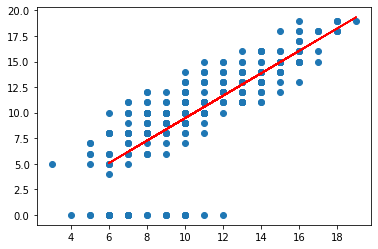

Univariate Closed Form Model
r2_score   :  0.7327023632663449
RMSE       :  2.366706783233821


In [ ]:
univariate_closed_form_model = univariate_closed_form()
# Learning
univariate_closed_form_model.train(X_uni_train, Y_train)
# Inferance
univariate_closed_form_model.predict(X_uni_test)
# Plotting
univariate_closed_form_model.plot()
# Checking Accuracy
print("Univariate Closed Form Model")
print("r2_score   : ",univariate_closed_form_model.r2_score(Y_test))
print("RMSE       : ",univariate_closed_form_model.rmse(Y_test))

###### Univariate Gradient Descent Model

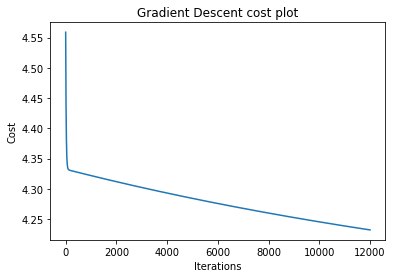

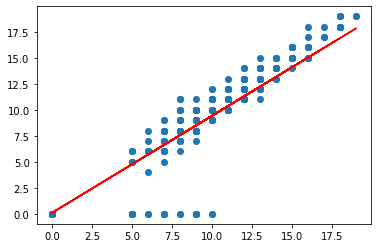

Univariate Gradient Descent Model
r2_score   :  0.8464102631259711
RMSE       :  1.79402294892482


In [ ]:
univaraite_gradient_descent_model = univaraite_gradient_descent(12000)
# Learning
univaraite_gradient_descent_model.train(X_uni_train, Y_train)
# Inferance
univaraite_gradient_descent_model.predict(X_uni_test)
# Plotting
univaraite_gradient_descent_model.plotCosts()
univaraite_gradient_descent_model.plot()
# Checking Accuracy
print("Univariate Gradient Descent Model")
print("r2_score   : ",univaraite_gradient_descent_model.r2_score(Y_test))
print("RMSE       : ",univaraite_gradient_descent_model.rmse(Y_test))

###### Univariate Newton's Method Model

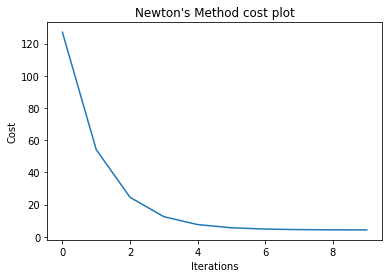

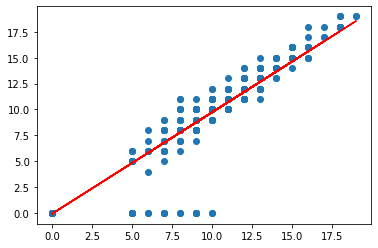

Univariate Newton's Method Model
r2_score   :  0.8640733363888544
RMSE       :  1.6877154438431767


In [ ]:
univariate_newtons_method_model = univariate_newtons_method(10,.1)
# Learning
univariate_newtons_method_model.train(X_uni_train, Y_train)
# Inferance
univariate_newtons_method_model.predict(X_uni_test)
# Plotting
univariate_newtons_method_model.plotCosts()
univariate_newtons_method_model.plot()
# Checking Accuracy
print("Univariate Newton's Method Model")
print("r2_score   : ",univariate_newtons_method_model.r2_score(Y_test))
print("RMSE       : ",univariate_newtons_method_model.rmse(Y_test))

###### Multivariate Closed Form Model

In [ ]:
multivariate_closed_form_model = multivariate_closed_form()
# Learning
multivariate_closed_form_model.train(X_mul_train, Y_train)
# Inferance
multivariate_closed_form_model.predict(X_mul_test)
# Checking Accuracy
print("Multivariate Closed Form Model")
print("r2_score   : ",multivariate_closed_form_model.r2_score(Y_test))
print("RMSE       : ",multivariate_closed_form_model.rmse(Y_test))

Multivariate Closed Form Model
r2_score   :  0.8748474272592113
RMSE       :  1.6194471773109114


###### Multivariate Gradient Descent Model

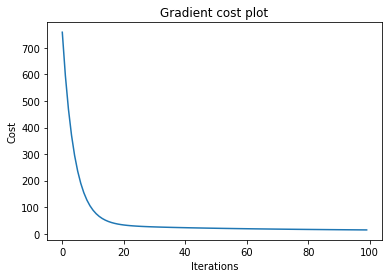

Multivariate Gradient Descent Model
r2_score   :  0.17288732900519144
RMSE       :  4.163218771150442


In [ ]:
multivariate_gradiant_descent_model = multivariate_gradiant_descent()
# Learning
multivariate_gradiant_descent_model.train(X_mul_train, Y_train)
# Inferance
multivariate_gradiant_descent_model.predict(X_mul_test)
# Plotting
multivariate_gradiant_descent_model.plotCosts()
# Checking Accuracy
print("Multivariate Gradient Descent Model")
print("r2_score   : ",multivariate_gradiant_descent_model.r2_score(Y_test))
print("RMSE       : ",multivariate_gradiant_descent_model.rmse(Y_test))

###### Multivariate Newton's Method Model

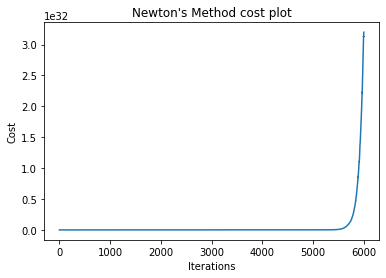

Multivariate Newton's Method Model
r2_score   :  -1.372075402049511e+31
RMSE       :  1.6956487157044076e+16


In [ ]:
multivariate_newtons_method_model = multivariate_newtons_method()
# Learning
multivariate_newtons_method_model.train(X_mul_train, Y_train)
# Inferance
multivariate_newtons_method_model.predict(X_mul_test)
# plot
multivariate_newtons_method_model.plotCosts()
# Checking Accuracy
print("Multivariate Newton's Method Model")
print("r2_score   : ",multivariate_newtons_method_model.r2_score(Y_test))
print("RMSE       : ",multivariate_newtons_method_model.rmse(Y_test))